In [45]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from qiskit.quantum_info import state_fidelity
import random
import math

# Create a quantum circuit with two qubits and classical registers for measurement
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr, cr)

# Apply a weak measurement to the first qubit
# This weak measurement is represented as a rotation of θ degrees
# We choose a weak measurement operator (Z-rotation) for demonstration
theta = 0.1  # Angle of rotation
qc.ry(theta, qr[0])
qc.ry(theta, qr[1])

# Measure the first qubit and store the result in a classical register
qc.measure(qr[0], cr[0])
# Apply post-measurement operations with probabilities p1 and p2
p2 = 0.001  # Probability for outcome |0⟩
p1 = 1-p2  # Probability for outcome |1⟩



# Visualize the Bloch vector of the first qubit after the weak measurement
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()


# Print the measurement results
print("Measurement results:", counts)
count_01 = counts.get('01', 0)

# Calculate the amplified value
amplified_value = theta/np.sqrt(count_01/1024)

# Print the amplified value
print("Amplified Value:", amplified_value)
print("The second qubit will be rotated by the amplified theta value after post-measuring first qubit")

Measurement results: {'00': 1023, '01': 1}
Amplified Value: 3.2
The second qubit will be rotated by the amplified theta value after post-measuring first qubit


In [46]:
qc.draw()

┌─────────┐┌─┐
q_0: ┤ Ry(0.1) ├┤M├
     ├─────────┤└╥┘
q_1: ┤ Ry(0.1) ├─╫─
     └─────────┘ ║ 
c: 2/════════════╩═
                 0

Final state of the second qubit: (0.9999999999999999+0j)


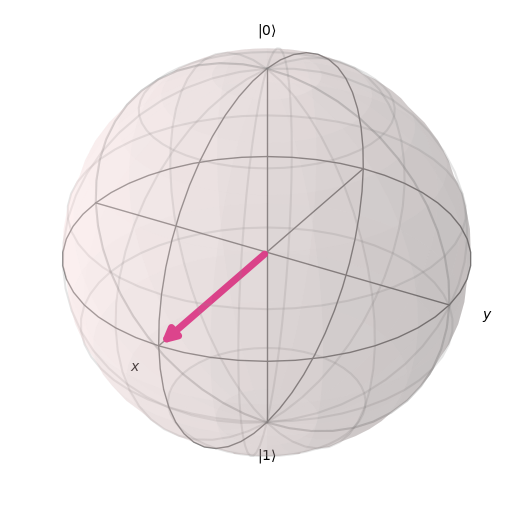

In [48]:
# Print the final state of the second qubit
final_second_state = statevector[2]  # Assuming little-endian ordering
normalized_second_state = final_second_state / np.linalg.norm(final_second_state)

print("Final state of the second qubit:", normalized_second_state)
# Visualize the Bloch vector of the normalized state
plot_bloch_vector([normalized_second_state.real, normalized_second_state.imag, 0])